<a href="https://colab.research.google.com/github/choyoujung/data-analysis/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_03_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A1%B0%EC%94%A8%EB%A5%BC_%EC%B0%BE%EC%95%84%EB%9D%BC_4_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 3. 공공데이터를 이용한 EDA 분석 - 구씨를 찾아라!

## [질문]
- **Q1. 우리나라 성씨 데이터 Top10은?**
- **Q2. 우리나라에서 '구씨'가 가장 많이 사는 지역은?**

In [1]:
# (코랩에서) 코드 실행 후 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc



---



### #.파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 1. 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 3. 데이터 전처리하기 : 필요한 데이터만 추출하기
 4. 데이터 시각화하기 : 데이터 그래프로 나타내기
 5. 데이터 저장하기 :  파일로 저장하기

## Q1. 우리나라 성씨 데이터 Top10은?

---

### 0.[사전준비] 라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 멧플롯립 한글폰트 지정
plt.rc('font', family='NanumBarunGothic')  # 코랩 폰트
# plt.rc('font', family='Malgun Gothic')     # 윈도우 폰트
plt.rcParams['axes.unicode_minus'] = False

### 1.데이터 다운로드하기

- 국가통계포털 사이트  https://kosis.kr/index/index.do
- 성씨ㆍ본관별_인구__시군구_~.csv 다운로드하기
 - ./data/성씨ㆍ본관별_인구__시군구_20240408173249.csv

---

### 2.데이터 불러오기
파일명(성씨ㆍ본관별_인구__시군구_~.csv)에서 뒷부분 숫자는 다운로드된 날짜의 시간정보로 선생님과 다를 수 있으니 자신이 다운로드 받은 파일명을 사용하면 됩니다.

In [6]:
# 파일 읽어서 pandas DataFrame으로 만들기
filenm = '성씨ㆍ본관별_인구__시군구_20240423100505.csv'
df = pd.read_csv(filenm)
df


,"성씨, 본관별",행정구역별(시군구),2015
0,계,전국,49705663
1,계,서울특별시,9567196
2,계,부산광역시,3404667
3,계,대구광역시,2436770
4,계,인천광역시,2822601
...,...,...,...
2764,기타,전라북도,3482
2765,기타,전라남도,4172
2766,기타,경상북도,4248
2767,기타,경상남도,5711


### 3.데이터 전처리하기 : 필요한 데이터만 추출하기

In [16]:
# 컬럼명 변경 --> ['성씨', '지역', '인구']
df.columns = ['성씨', '지역', '인구']
df.head()
# 전국 성씨 데이터 추출
df = df[(df['성씨'] != '계') & (df['지역'] == '전국')]
df = df.query("성씨 !='계' and 지역 =='전국'")
df.head()


,성씨,지역,인구
18,가(賈),전국,9936
36,간(簡),전국,2520
53,갈(葛),전국,2086
70,감(甘),전국,6024
88,강(姜),전국,1176847


#### @고유한 성씨만 출력하기

In [18]:
# 고유한 성씨(한자포함) 출력하기
set(df['성씨'])
df['성씨'].unique()

array(['가(賈)', '간(簡)', '갈(葛)', '감(甘)', '강(姜)', '강(康)', '견(甄)', '경(慶)',
       '경(景)', '계(桂)', '고(高)', '공(孔)', '곽(郭)', '구(丘)', '구(具)', '국(鞠)',
       '권(權)', '금(琴)', '기(奇)', '길(吉)', '김(金)', '나(羅)', '남(南)', '남궁(南宮)',
       '노(盧)', '노(魯)', '단(段)', '당(唐)', '도(都)', '도(陶)', '동(董)', '두(杜)',
       '라(羅)', '류(柳)', '마(馬)', '맹(孟)', '명(明)', '모(牟)', '목(睦)', '문(文)',
       '민(閔)', '박(朴)', '반(潘)', '방(房)', '방(方)', '배(裵)', '백(白)', '범(范)',
       '변(卞)', '변(邊)', '복(卜)', '봉(奉)', '부(夫)', '빈(賓)', '사(史)', '사공(司空)',
       '상(尙)', '서(徐)', '서문(西門)', '석(昔)', '석(石)', '선(宣)', '선우(鮮于)', '설(偰)',
       '설(薛)', '성(成)', '소(蘇)', '소(邵)', '손(孫)', '송(宋)', '승(承)', '시(施)',
       '시(柴)', '신(愼)', '신(申)', '신(辛)', '심(沈)', '안(安)', '양(梁)', '양(楊)',
       '어(魚)', '엄(嚴)', '여(余)', '여(呂)', '연(延)', '염(廉)', '예(芮)', '오(吳)',
       '옥(玉)', '온(溫)', '왕(王)', '용(龍)', '우(禹)', '원(元)', '위(魏)', '유(兪)',
       '유(劉)', '유(庾)', '유(柳)', '육(陸)', '윤(尹)', '은(殷)', '음(陰)', '이(李)',
       '인(印)', '임(任)', '임(林)', '장(張)', '장(章)', '장(蔣)', '전(全)', '전(田)'

In [19]:
# 고유한 성씨(한자포함) 총개수 출력하기
len(df['성씨'].unique())

154

In [24]:
# 고유한 한글 성씨(한자미포함) 총개수
# - 한글 성씨만 출력하기 -> '가(賈)'--> 가  만 추출하기
total = len(set([name.split('(')[0] for name in df['성씨'].unique()]))
names = set([name.split('(')[0] for name in df['성씨'].unique()])
print(f"고유한 성씨 갯수 : {total}")
print(f"고유한 성씨 : {sorted(list(names))}")
print(f"고유한 성씨set : {names}")


고유한 성씨 갯수 : 120
고유한 성씨 : ['가', '간', '갈', '감', '강', '견', '경', '계', '고', '공', '곽', '구', '국', '권', '금', '기', '기타', '길', '김', '나', '남', '남궁', '노', '단', '당', '도', '동', '두', '라', '류', '마', '맹', '명', '모', '목', '문', '민', '박', '반', '방', '배', '백', '범', '변', '복', '봉', '부', '빈', '사', '사공', '상', '서', '서문', '석', '선', '선우', '설', '성', '소', '손', '송', '승', '시', '신', '심', '안', '양', '어', '엄', '여', '연', '염', '예', '오', '옥', '온', '왕', '용', '우', '원', '위', '유', '육', '윤', '은', '음', '이', '인', '임', '장', '전', '정', '제', '제갈', '조', '좌', '주', '지', '진', '차', '채', '천', '최', '추', '탁', '태', '팽', '편', '표', '피', '하', '한', '함', '허', '현', '형', '호', '홍', '황', '황보']
고유한 성씨set : {'복', '지', '박', '태', '연', '명', '선우', '어', '신', '여', '현', '원', '석', '전', '갈', '추', '시', '탁', '배', '경', '성', '이', '천', '홍', '허', '유', '주', '표', '정', '심', '사', '간', '사공', '황', '반', '맹', '안', '인', '기', '빈', '방', '하', '범', '가', '장', '공', '단', '옥', '김', '온', '엄', '국', '민', '양', '임', '은', '소', '감', '제갈', '당', '구', '도', '서', '남', '송', '최', '문', '한', '변', '부', '

- '성씨'에서 한글만 추출하여 '성씨'컬럼으로 만들기

In [32]:
# '성씨'에서 한글만 추출하여 '성씨'컬럼으로 만들고 df_all로 만들기
#하니씩 불러와서 처리
df_all = df.copy()
for idx in df_all.index:
    fname = df_all.loc[idx,'성씨'].split('(')[0]
    df_all.loc[idx,'성씨'] = fname
df_all[df_all['성씨'] == '유']

,성씨,지역,인구
1710,유,전국,167927
1728,유,전국,302511
1746,유,전국,13868
1764,유,전국,478990


- 한글 성씨별로 그룹핑하기(한자를 다르게 쓰는 ['성씨'] 합하기)

In [38]:
# 한글 성씨별로 그룹핑하여 df_all_group으로 지정하기
df_all[df_all['성씨'] == '유']
df_all_group = df_all.groupby('성씨').sum(numeric_only=True) #숫자 데이타만 썸
df_all_group


,인구
성씨,
가,9936
간,2520
갈,2086
감,6024
강,1268472
...,...
형,7239
호,5834
홍,558853


- 인구 순으로 Top10 (내림차순 정렬하기)

In [44]:
# '인구' 크기순으로 Top10 (내림차순 정렬하기)
data = df_all_group.sort_values(by='인구',ascending=False).head(10)


### 4.데이터 시각화하기

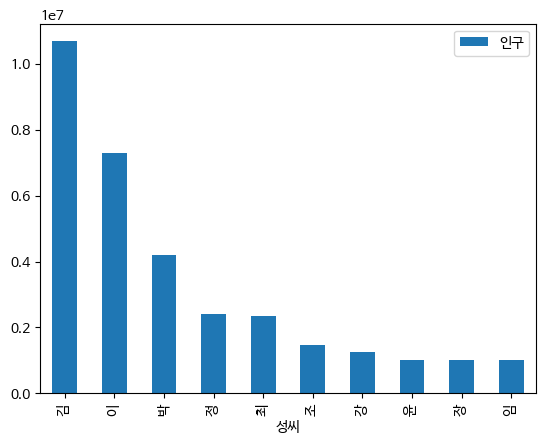

In [47]:
# 막대 그래프로 나타내기
data = df_all_group.sort_values(by='인구',ascending=False).head(10)
# x = data.index
# y = data.인구
# plt.bar(x, y)
data.plot(kind = 'bar')
plt.show()


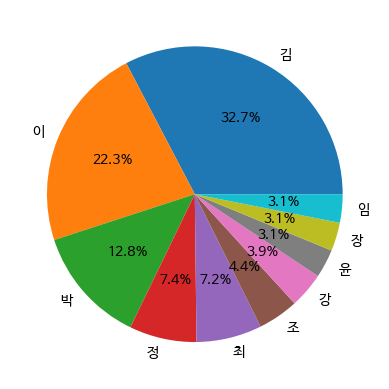

In [53]:
# 파이 그래프로 나타내기
plt.pie(data.인구, labels=data.index, autopct='%1.1f%%')
plt.show()

### 5.파일로 저장하기

In [51]:
# 파일명 지정하여 저장하기
data.to_csv('family_name_top10.csv', encoding = 'cp949')


----------------------------------

## Q2. 우리나라에서 '구씨'가 가장 많이 사는 지역은?

### 1.데이터 다운로드하기

### 2.데이터 불러오기

In [57]:
# 파일 읽어서 pandas DataFrame으로 만들기
filenm = '성씨ㆍ본관별_인구__시군구_20240423100505.csv'
df = pd.read_csv(filenm)
df

,"성씨, 본관별",행정구역별(시군구),2015
0,계,전국,49705663
1,계,서울특별시,9567196
2,계,부산광역시,3404667
3,계,대구광역시,2436770
4,계,인천광역시,2822601
...,...,...,...
2764,기타,전라북도,3482
2765,기타,전라남도,4172
2766,기타,경상북도,4248
2767,기타,경상남도,5711


### 3.데이터 전처리하기 : 필요한 데이터만 추출하기

In [78]:
# 컬럼명 변경 --> ['성씨', '지역', '인구']
df.columns = ['성씨', '지역', '인구']

# 성씨는 '계'가 아니고 지역은 '전국'이 아닌 성씨 데이터 추출
df.query("성씨 !='계' and 지역 != '전국'")
df

,성씨,지역,인구
0,계,전국,49705663
1,계,서울특별시,9567196
2,계,부산광역시,3404667
3,계,대구광역시,2436770
4,계,인천광역시,2822601
...,...,...,...
2764,기타,전라북도,3482
2765,기타,전라남도,4172
2766,기타,경상북도,4248
2767,기타,경상남도,5711


#### @[성씨]가  '구'인 데이터 추출하기

In [66]:
# [성씨] 열에서 '구'가 포함된 데이터 출력 & df_foo로 지정하기
fnm = '조'
df_goo = df[df.성씨.str.contains(fnm)]
df_goo

,성씨,지역,인구
2124,조(曺),전국,398260
2125,조(曺),서울특별시,73956
2126,조(曺),부산광역시,33124
2127,조(曺),대구광역시,23288
2128,조(曺),인천광역시,18842
2129,조(曺),광주광역시,22880
2130,조(曺),대전광역시,10136
2131,조(曺),울산광역시,8116
2132,조(曺),세종특별자치시,1176
2133,조(曺),경기도,86469


### **[실습문제] 자신의 성씨 데이터 출력하기**


In [ ]:
# [성씨] 열에서 '구'가 포함되고, [지역] 열에서 '전국' 제외하고 가져오기
family_name = '조'
df_my =
df_my

#### @데이터 그룹핑: ‘구’씨 성을 가진 데이터를 [지역]별로 [인구] 합계 출력하기

In [70]:
# 1.'구'씨 데이터를 [지역]별 합계 구하기 (groupby)
df_gr = df_goo.groupby('지역').sum(numeric_only=True)

# 2.지역별 합계 데이터를 '인구' 크기순으로 정렬하기 (sort_values)
df_gr1=df_gr.sort_values(by='인구', ascending = False)
df_gr1

,인구
지역,
전국,1453827
경기도,360228
서울특별시,289954
경상남도,102919
부산광역시,96431
인천광역시,86458
경상북도,64043
충청남도,63378
대구광역시,63004


### **[실습문제] 자신의 한글 성씨 데이터를 [지역]별로 [인구] 합계 출력하기**

In [ ]:
# 자신의 한글 성씨 데이터를 지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_my_group =
df_my_group

---------------------------

### 4.데이터 시각화하기 : 데이터 그래프로 나타내기
- 색상 참고 :  https://matplotlib.org/stable/gallery/color/named_colors.html

#### @막대 그래프로 시각화하기

In [ ]:
df_goo_group.columns

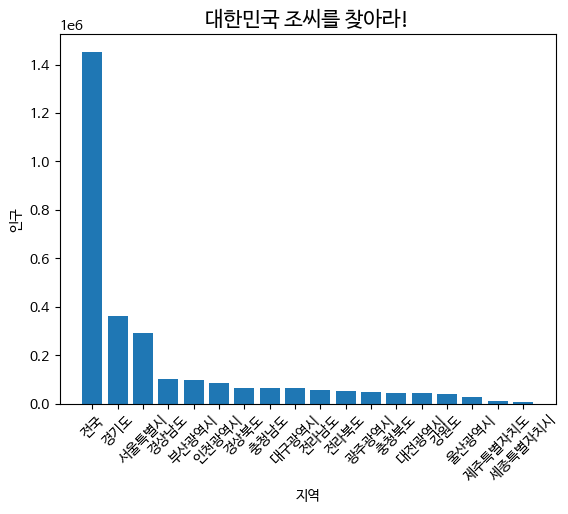

In [74]:
import matplotlib.pyplot as plt

# 1.그래프 데이터 지정하기(X축, Y축)
x =    df_gr1.index
y =    df_gr1.인구

# 2.막대 그래프 그리기
plt.bar(x, y)

# 3. 그래프 꾸미기
     # 그래프 제목
     # x축 이름
     # y축 이름
     # X축 레이블 회전
     # 그래프 출력하기
plt.title('대한민국 조씨를 찾아라!', fontsize = 15)
plt.xlabel('지역')
plt.ylabel('인구')
plt.xticks(rotation=45)
plt.show()

#### @그래프 꾸미기

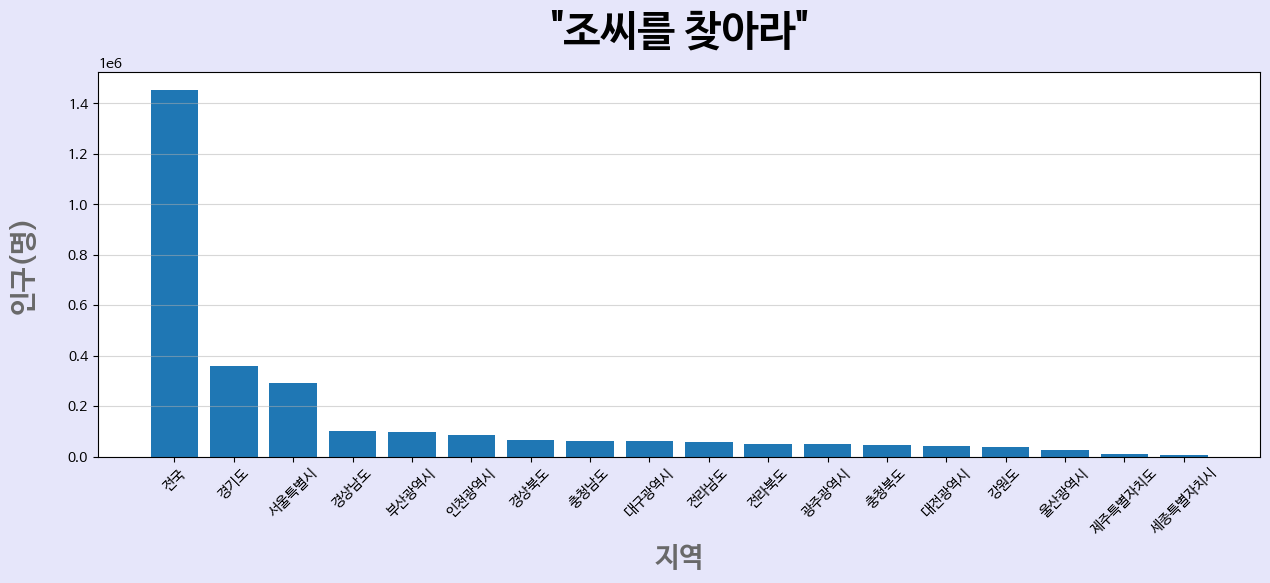

In [93]:
import matplotlib.pyplot as plt

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_gr1.index
y = df_gr1.인구

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
        # 막대 그래프 그리기
plt.bar(x,y)
# 3. 그래프 꾸미기
plt.title('"조씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)     # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### @선 그래프로 시각화하기

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
# plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_gr1.index     # 지역
y = df_gr1['인구']   # 인구수

# 2.그래프 그리기 (선그래프 그리기)
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
        # 선 그래프 그리기

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### @혼합 그래프

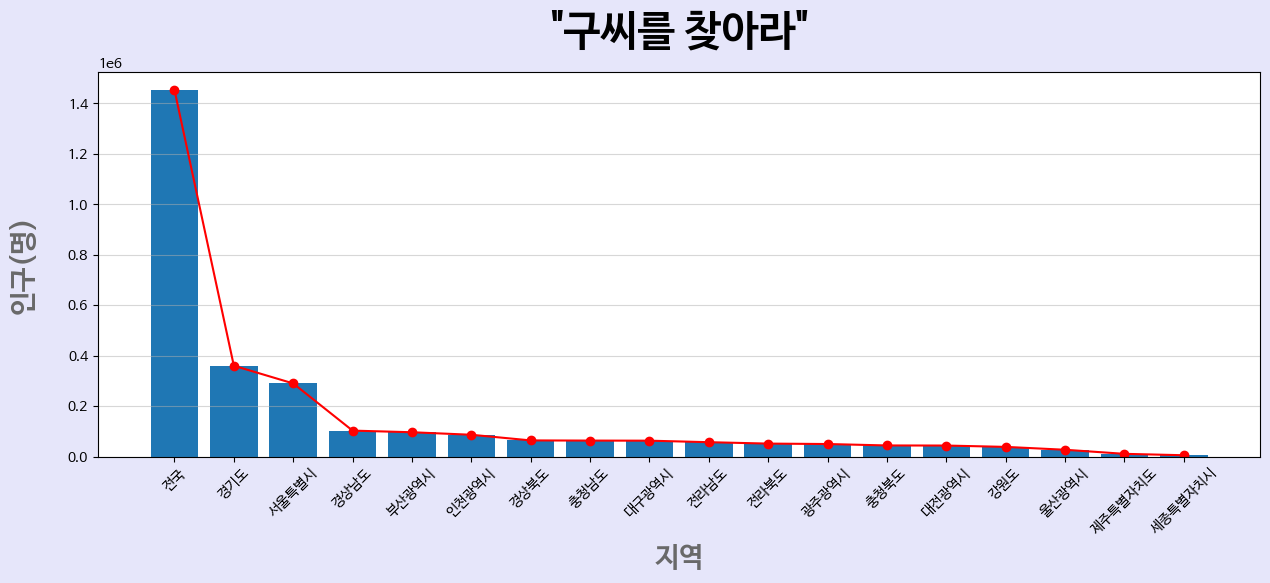

In [82]:
import matplotlib.pyplot as plt


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_gr1.index     # 지역
y = df_gr1['인구']   # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
       # 막대 그래프
plt.bar(x, y)
       # 선 그래프
plt.plot(x, y, '-or') #

# 3.그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                 # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)  # 그래프에 그리드 표현하기
plt.savefig('famile_name_cho.png')  #이미지 파일로 저장
plt.show() # 그래프 그리기

### 5. 데이터 저장하기 : 데이터 파일로 저장하기

In [83]:
# 파일명 지정하여 저장하기
file = './family_name_cho.csv'  # 파일명
df_gr1.to_csv(file, encoding = 'cp949', mode = 'w') # 파일 저장하기

-----------------------------------------

### **[실습문제] 워드클라우드로 시각화하기**

In [84]:
# 라이브러리 설치하기
!pip install wordcloud

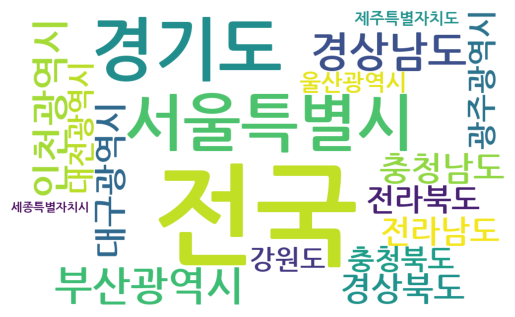

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'  # (코랩)폰트 지정
# font_path = 'HMFMOLD' # C:/Windows/Fonts/HMKMMAG.TTF     #HMFMOLD.TTF
# font_path = 'malgun'  # C:/Windows/Fonts/


# 2.전처리된 데이터 지정하기 (딕셔너리 형태로 지정해야함)
#  - (토큰명, 빈도수) 딕셔너리 타입으로 변환
# 지역, 빈도
data = dict(zip(df_gr1.index, df_gr1.인구))


# 3.워드클라우드 그래프로 시각화하기
wc = WordCloud(width = 1000, height = 600,
               background_color="white",
               font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 4.파일로 저장하기
wc.to_file('./조씨_워드클라우드.png')

#### **@투명한 이미지(알파값이 적용된)에 워드 클라우드 나타내기**
마스크 이미지 파일이 필요하다.

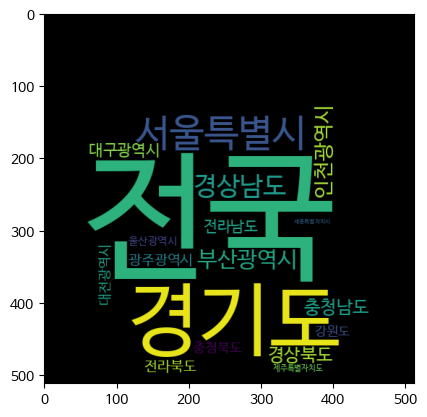

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import cv2 #이미지
import numpy as np

# 1.자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정(window에서)
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 코랩에서
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'H2HDRM' # C:/Windows/Fonts/H2HDRM.TTF


# 2.전처리된 데이터 지정하기 (딕셔너리 형태로 지정해야함)
#  - (토큰명, 빈도수) 딕셔너리 타입으로 변환
data = dict(zip(df_gr1.index, df_gr1.인구))



# 워드클라우드로 그래프로 시각화
img = cv2.imread('./apple.png')   # 알파값(투명) 값이 포함된 이미지 파일
img_array = np.array(img)
wc = WordCloud(background_color="black",
               font_path=font_path,
               max_font_size=250,
               mask=img_array)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 파일로 저장하기
wc.to_file('./사과모양_워드클라우드.png')



---



### **[[미션]] **
자신의 성씨 데이터 지역별로 그룹핑해서 그래프 그리고 데이터 파일을 저장하기 나타내기

----------------------------------

THE END